In [1]:
# import libraries
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB7
import tensorflow as tf

In [2]:
# define location of dataset
folder = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/train/'
train_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dog-cat-butterfly/train/'
test_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dog-cat-butterfly/test/'
valid_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dog-cat-butterfly/valid/'

In [3]:
# create directories
dataset_home = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/', 'butterfly/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)
    elif file.startswith('butterfly'):
        dst = dataset_home + dst_dir + 'butterfly/'  + file
        copyfile(src, dst)

In [ ]:
# create directories
dataset_home = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/'
subdirs = ['train2/', 'valid/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/', 'butterfly/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.1
# copy training dataset images into subdirectories
src_directory = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'valid/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)
    elif file.startswith('butterfly'):
        dst = dataset_home + dst_dir + 'butterfly/'  + file
        copyfile(src, dst)

VGG 1

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/10
318/318 [==============================] - 451s 1s/step - loss: 0.8856 - accuracy: 0.5424 - val_loss: 0.7899 - val_accuracy: 0.6063
Epoch 2/10
318/318 [==============================] - 426s 1s/step - loss: 0.7409 - accuracy: 0.6197 - val_loss: 0.6757 - val_accuracy: 0.6545
Epoch 3/10
318/318 [==============================] - 437s 1s/step - loss: 0.6741 - accuracy: 0.6661 - val_loss: 0.6303 - val_accuracy: 0.6849
Epoch 4/10
318/318 [==============================] - 429s 1s/step - loss: 0.6320 - accuracy: 0.6898 - val_loss: 0.6365 - val_accuracy: 0.7023
Epoch 5/10
318/318 [==============================] - 428s 1s/step - loss: 0.5893 - accuracy: 0.7240 - val_loss: 0.5747 - val_accuracy: 0.7179
Epoch 6/10
318/318 [==============================] - 432s 1s/step - loss: 0.5490 - accuracy: 0.7490 - val_loss: 0.5728 - val_accuracy: 0.7222
Epoch 7/10
318/

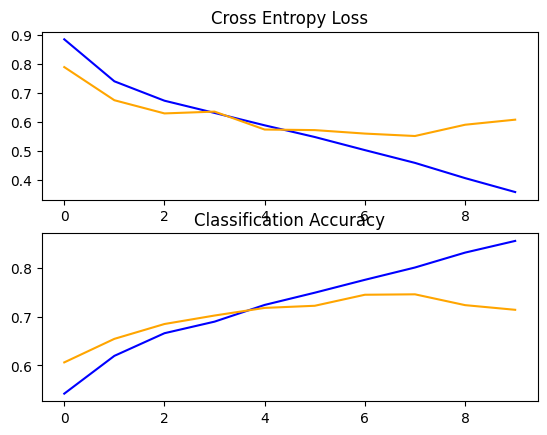

In [18]:
# define cnn model (VGG1)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(valid_it), epochs=10, verbose=1)
	# save model
	model.save('./models/vgg1_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG 2

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/10
318/318 [==============================] - 685s 2s/step - loss: 0.8385 - accuracy: 0.5762 - val_loss: 0.6839 - val_accuracy: 0.6467
Epoch 2/10
318/318 [==============================] - 672s 2s/step - loss: 0.6930 - accuracy: 0.6622 - val_loss: 0.7181 - val_accuracy: 0.6549
Epoch 3/10
318/318 [==============================] - 673s 2s/step - loss: 0.6293 - accuracy: 0.7084 - val_loss: 0.6067 - val_accuracy: 0.7218
Epoch 4/10
318/318 [==============================] - 672s 2s/step - loss: 0.5652 - accuracy: 0.7459 - val_loss: 0.5499 - val_accuracy: 0.7574
Epoch 5/10
318/318 [==============================] - 670s 2s/step - loss: 0.5232 - accuracy: 0.7658 - val_loss: 0.5658 - val_accuracy: 0.7383
Epoch 6/10
318/318 [==============================] - 671s 2s/step - loss: 0.4758 - accuracy: 0.7917 - val_loss: 0.5586 - val_accuracy: 0.7474
Epoch 7/10
318/

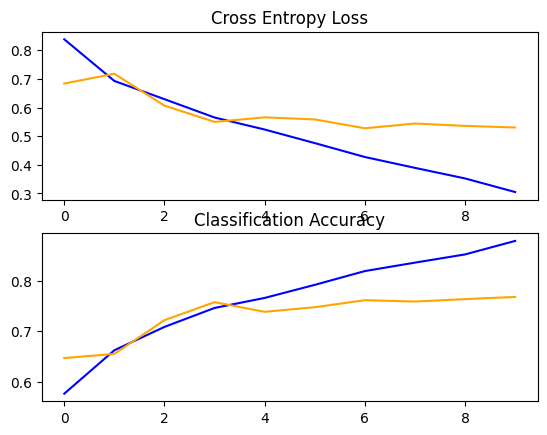

In [19]:
# define cnn model (VGG2)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(valid_it), epochs=10, verbose=1)
	# save model
	model.save('./models/vgg2_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG 3

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/10
318/318 [==============================] - 624s 2s/step - loss: 0.8113 - accuracy: 0.5758 - val_loss: 0.6896 - val_accuracy: 0.6727
Epoch 2/10
318/318 [==============================] - 640s 2s/step - loss: 0.6630 - accuracy: 0.6752 - val_loss: 0.5987 - val_accuracy: 0.7040
Epoch 3/10
318/318 [==============================] - 649s 2s/step - loss: 0.6051 - accuracy: 0.7150 - val_loss: 0.5724 - val_accuracy: 0.7352
Epoch 4/10
318/318 [==============================] - 634s 2s/step - loss: 0.5527 - accuracy: 0.7447 - val_loss: 0.5308 - val_accuracy: 0.7487
Epoch 5/10
318/318 [==============================] - 639s 2s/step - loss: 0.5038 - accuracy: 0.7764 - val_loss: 0.7022 - val_accuracy: 0.6988
Epoch 6/10
318/318 [==============================] - 635s 2s/step - loss: 0.4634 - accuracy: 0.7978 - val_loss: 0.5190 - val_accuracy: 0.7617
Epoch 7/10
318/

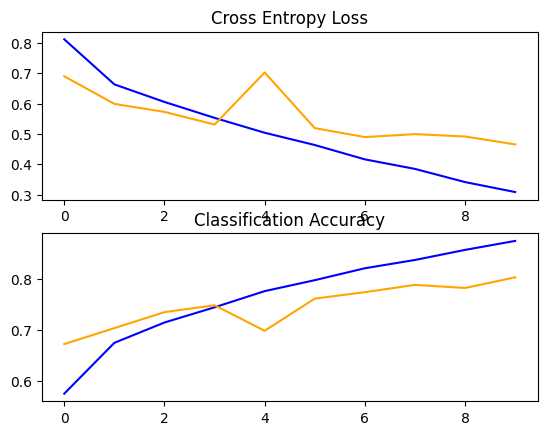

In [10]:
# define cnn model (VGG3)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(valid_it), epochs=10, verbose=1)
	# save model
	model.save('./models/vgg3_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Dropout Regularization

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/20
318/318 [==============================] - 698s 2s/step - loss: 1.1499 - accuracy: 0.4595 - val_loss: 0.9009 - val_accuracy: 0.4761
Epoch 2/20
318/318 [==============================] - 693s 2s/step - loss: 0.8681 - accuracy: 0.5099 - val_loss: 0.8012 - val_accuracy: 0.5820
Epoch 3/20
318/318 [==============================] - 692s 2s/step - loss: 0.8129 - accuracy: 0.5427 - val_loss: 0.7668 - val_accuracy: 0.5929
Epoch 4/20
318/318 [==============================] - 697s 2s/step - loss: 0.7833 - accuracy: 0.5785 - val_loss: 0.7416 - val_accuracy: 0.6619
Epoch 5/20
318/318 [==============================] - 694s 2s/step - loss: 0.7573 - accuracy: 0.5883 - val_loss: 0.6964 - val_accuracy: 0.6714
Epoch 6/20
318/318 [==============================] - 695s 2s/step - loss: 0.7468 - accuracy: 0.6015 - val_loss: 0.6794 - val_accuracy: 0.6840
Epoch 7/20
318/

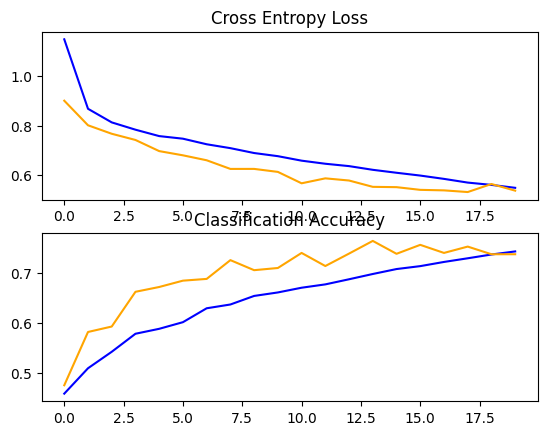

In [11]:
# baseline model with dropout for the dogs vs cats dataset
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(valid_it), epochs=20, verbose=1)
	# save model
	model.save('./models/dropout_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Image Data Augmentation

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/20
318/318 [==============================] - 634s 2s/step - loss: 1.0117 - accuracy: 0.5327 - val_loss: 0.7242 - val_accuracy: 0.6463
Epoch 2/20
318/318 [==============================] - 630s 2s/step - loss: 0.7371 - accuracy: 0.6303 - val_loss: 0.6438 - val_accuracy: 0.6910
Epoch 3/20
318/318 [==============================] - 633s 2s/step - loss: 0.6830 - accuracy: 0.6715 - val_loss: 0.7082 - val_accuracy: 0.6619
Epoch 4/20
318/318 [==============================] - 633s 2s/step - loss: 0.6452 - accuracy: 0.6957 - val_loss: 0.6330 - val_accuracy: 0.7109
Epoch 5/20
318/318 [==============================] - 634s 2s/step - loss: 0.6163 - accuracy: 0.7117 - val_loss: 0.5474 - val_accuracy: 0.7530
Epoch 6/20
318/318 [==============================] - 634s 2s/step - loss: 0.5972 - accuracy: 0.7247 - val_loss: 0.5212 - val_accuracy: 0.7730
Epoch 7/20
318/

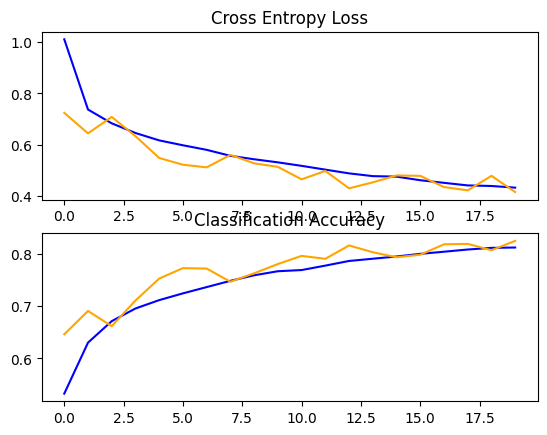

In [12]:
# baseline model with data augmentation for the dogs vs cats dataset
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = valid_datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(valid_it), epochs=20, verbose=1)
	# save model
	model.save('./models/da_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG16

Found 20342 images belonging to 3 classes.
Found 5651 images belonging to 3 classes.
Found 2260 images belonging to 3 classes.
Epoch 1/3
318/318 [==============================] - 2431s 8s/step - loss: 0.6823 - accuracy: 0.9568 - val_loss: 0.0830 - val_accuracy: 0.9646
Epoch 2/3
318/318 [==============================] - 2457s 8s/step - loss: 0.0462 - accuracy: 0.9846 - val_loss: 0.1063 - val_accuracy: 0.9717
Epoch 3/3
89/89 [==============================] - 625s 7s/step - loss: 0.1322 - accuracy: 0.9736
> 97.363


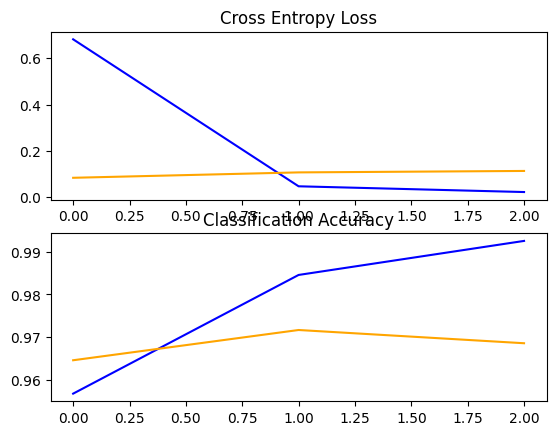

In [21]:
# VGG16 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(200, 200, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	# cganging the output layer to predict 3 classes (dog, cat and butterfly)
	output = Dense(3, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	# changing the loss for multiclass classifications
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=3, verbose=1)
	# save model
	model.save('./models/vgg16_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

EfficientNetB7

In [ ]:
# EfficientNetB7 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():
	# load model
	model = EfficientNetB7(include_top=False, input_shape=(200, 200, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	# cganging the output layer to predict 3 classes (dog, cat and butterfly)
	output = Dense(3, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = Adam(learning_rate=0.001)
	# changing the loss for multiclass classifications
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	valid_it = datagen.flow_from_directory(valid_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=3, verbose=1)
	# save model
	model.save('./models/eficb7_model.h5')
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [3]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


folder = 'C:/Users/vitorugo/OneDrive - Nokia/TAIA/code/models/'
test_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dog-cat-butterfly/test/'
datagen = ImageDataGenerator(rescale=1.0/255.0)
test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', target_size=(200, 200))
for file in listdir(folder):
    model = load_model(folder + file)
    y_pred = model.predict(test_it)
    pred = np.argmax(y_pred, axis=1)

    print(file)
    print(classification_report(test_it.classes, pred))
    print("Recall: ", round(recall_score(test_it.classes, pred, average="weighted"), 4))
    print("Precision: ", round(precision_score(test_it.classes, pred, average="weighted"), 4))
    print("F1: ", round(f1_score(test_it.classes, pred, average="weighted"), 4))
    print("Accuracy: ", round(accuracy_score(test_it.classes, pred), 4))


Found 5651 images belonging to 3 classes.
177/177 [==============================] - 41s 230ms/step
da_model.h5
              precision    recall  f1-score   support

           0       0.11      0.13      0.12       651
           1       0.43      0.41      0.42      2500
           2       0.44      0.44      0.44      2500

    accuracy                           0.39      5651
   macro avg       0.33      0.33      0.33      5651
weighted avg       0.40      0.39      0.40      5651

Recall:  0.3932
Precision:  0.3997
F1:  0.3962
Accuracy:  0.3932
177/177 [==============================] - 42s 239ms/step
dropout_model.h5
              precision    recall  f1-score   support

           0       0.12      0.11      0.11       651
           1       0.44      0.60      0.51      2500
           2       0.44      0.30      0.36      2500

    accuracy                           0.41      5651
   macro avg       0.33      0.33      0.33      5651
weighted avg       0.41      0.41      0.